# Exploratory Data Analysis-1

---
#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

The wine quality data set typically consists of various chemical and physical properties of wines, such as acidity levels, alcohol content, pH, and others. The key features in the data set might include:
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

The importance of each feature in predicting the quality of wine depends on its influence on the taste and overall quality of the wine. For example:
- **Acidity levels (fixed and volatile acidity, citric acid):** Acidity can significantly impact the taste of wine. Too much acidity can make the wine taste sour, while too little can make it taste flat. These features are crucial for determining the wine's balance.
- **Residual sugar:** It contributes to the wine's sweetness. Sweeter wines tend to have a different quality compared to dry wines. The right balance is essential.
- **Chlorides:** High chloride levels can make wine taste salty or briny, affecting its quality.
- **Sulfur dioxide levels:** Sulfur dioxide is often added to wine as a preservative. Balancing its levels is essential to avoid an unpleasant sulfur smell or taste.
- **Alcohol:** Alcohol content can influence the body and mouthfeel of the wine. Higher alcohol content can contribute to a fuller body.
- **pH:** pH affects the stability and taste of the wine. Proper pH levels are crucial for preserving the wine's quality.
- **Sulphates:** Sulphates may contribute to the wine's aroma and overall quality.

---
#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Handling missing data is a critical step in the feature engineering process. The choice of imputation technique depends on the nature of the data and the problem. Common techniques include:
* Mean/Median imputation: Replace missing values with the mean or median of the feature. This is simple and can work well for numerical features. However, it doesn't account for relationships between variables.
* Mode imputation: For categorical features, you can replace missing values with the mode (most frequent value). It's suitable for categorical data with few missing values.
* Forward fill or backward fill: This is useful for time series data. Missing values are filled with the previous or next available value, respectively. It maintains the temporal order.
* Interpolation: Interpolation methods estimate missing values based on the existing data points. Linear interpolation is common for time series data.

Advantages and disadvantages:
* Mean/Median: Advantages include simplicity and not introducing bias into the data. However, it ignores potential correlations between variables.
* Mode: Useful for categorical data, but it doesn't work well for numerical data.
* Forward/backward fill: Suitable for sequential data but may not work well for non-sequential data. It can propagate errors if the missing data is not temporally related.
* Interpolation: Preserves the data's continuity and can provide more accurate estimates, especially for time series data. However, it may introduce noise if the underlying relationships are complex.

---
#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Key factors affecting students' exam performance can vary, but common ones include:
* **Study habits:** The amount and quality of study time.
* **Prior knowledge:** Students' understanding of the subject matter.
* **Teacher quality:** The effectiveness of the instructor.
* **Class attendance:** Regular attendance and engagement in lectures.
* **Motivation:** Intrinsic and extrinsic motivation to succeed.
* **Health and well-being:** Physical and mental health.
* **Socioeconomic factors:** Family background, financial stability.
* **Test anxiety:** Psychological factors affecting exam performance.

To analyze these factors, you can use statistical techniques such as:
* **Regression analysis:** To assess the impact of various factors on exam scores.
* **Correlation analysis:** To identify relationships between variables (e.g., correlation between study time and exam scores).
* **ANOVA:** To analyze variance in exam scores across different groups (e.g., based on teacher quality or study habits).
* **Hypothesis testing:** To determine whether specific factors have a significant impact on exam performance.
* **Factor analysis:** To identify latent variables (e.g., student motivation) that may affect performance.

A comprehensive analysis would involve collecting data on these factors, cleaning and preprocessing the data, and then applying appropriate statistical tests and models to draw meaningful conclusions.

---
#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Feature engineering involves selecting, creating, and transforming variables to improve the performance of a predictive model. In the context of the student performance data set, the process might include:
* **Feature Selection:** Start by identifying the most relevant features for predicting student performance. This can be done through domain knowledge or statistical techniques like correlation analysis or feature importance from machine learning models.
* **Encoding Categorical Variables:** If the data set contains categorical variables like gender or school type, encode them into numerical format using techniques like one-hot encoding or label encoding.
* **Feature Scaling:** Standardize or normalize numerical features to ensure they have similar scales. This helps algorithms that are sensitive to feature scales, like gradient-based methods.
* **Feature Creation:** Generate new features that might be more informative than the original ones. For example, you could calculate a student's average score across multiple exams or create a binary feature indicating whether a student attended a certain number of classes.
* **Handling Missing Data:** As discussed earlier, decide on an appropriate imputation strategy for missing values, such as mean imputation for numerical features or mode imputation for categorical features.
* **Binning or Discretization:** Convert continuous numerical features into categorical ones by creating bins or categories. For example, you could group ages into ranges like "teen," "young adult," and "adult."
* **Feature Scaling:** Ensure all features have similar scales to avoid dominance by a single feature during modeling.
* **Feature Transformation:** Apply mathematical transformations like logarithms or square roots to features to make their distributions more suitable for modeling. This can help when dealing with non-normal data.
* **Feature Engineering Iteration:** Iteratively evaluate the impact of your feature engineering choices on model performance. You may need to revisit earlier steps if the initial model results are unsatisfactory.

---
#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

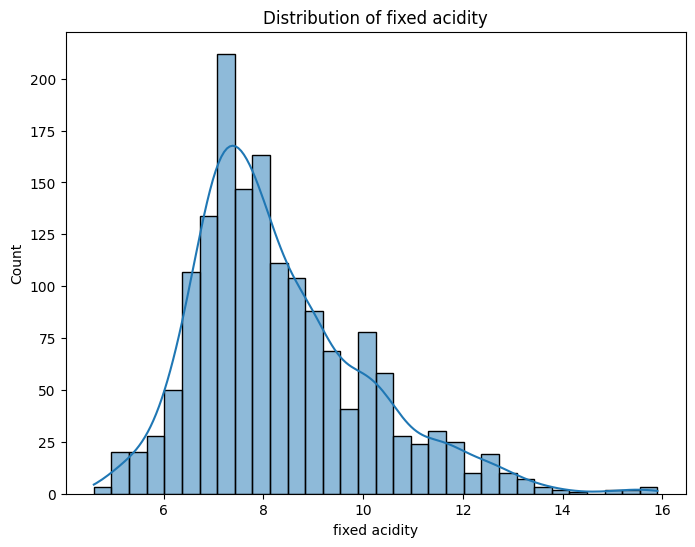

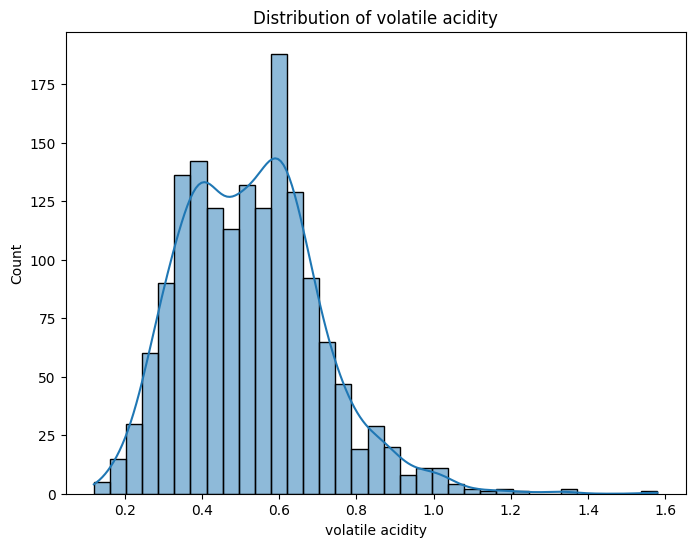

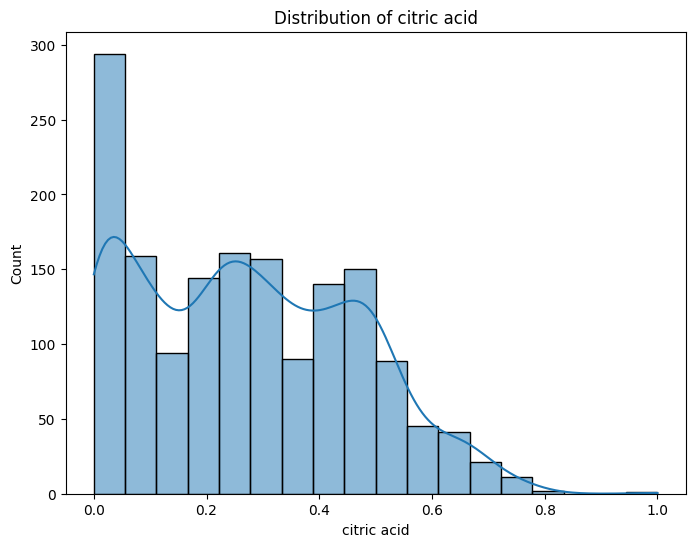

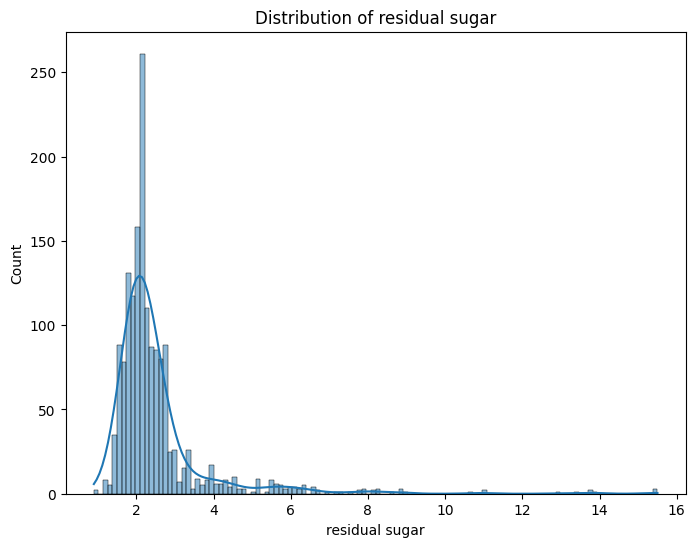

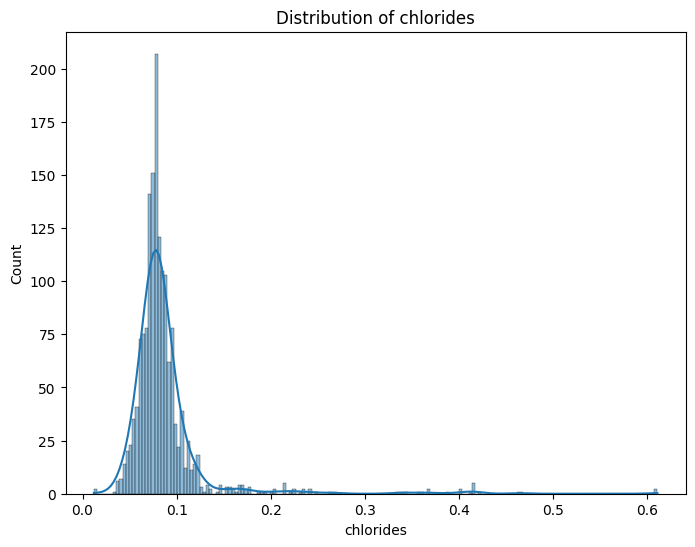

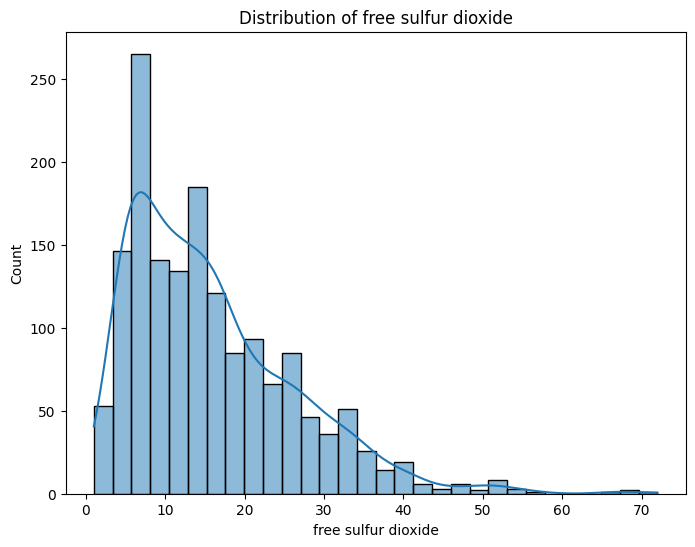

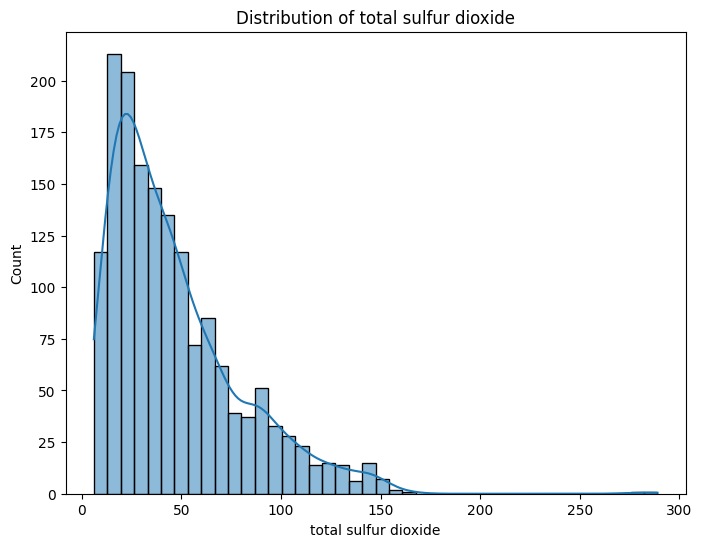

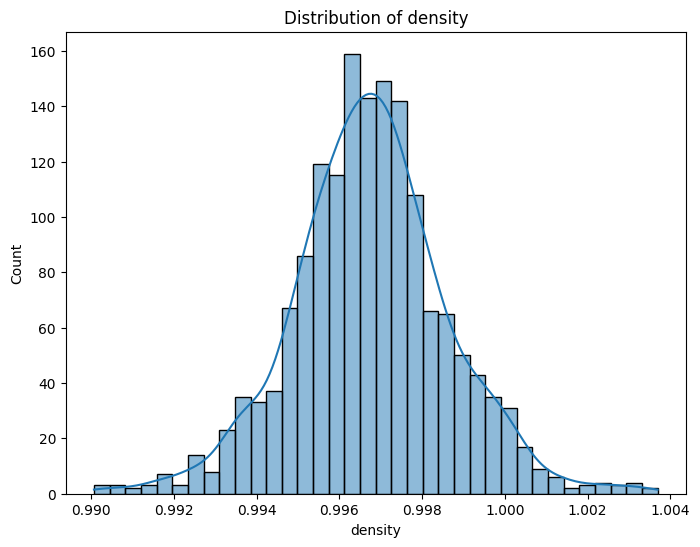

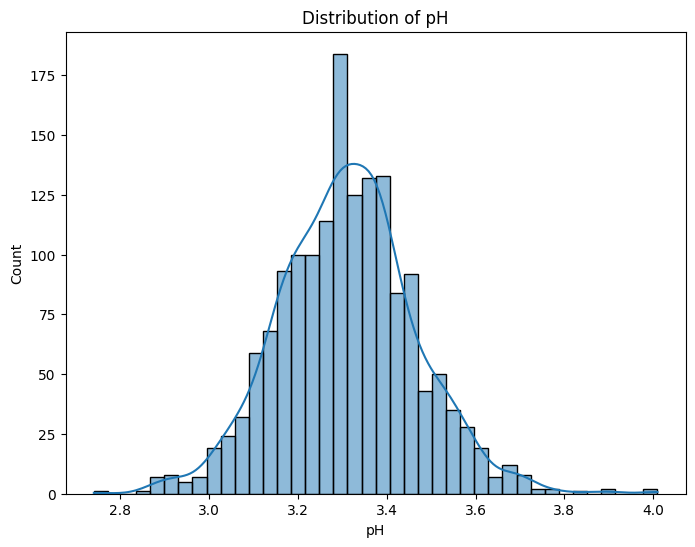

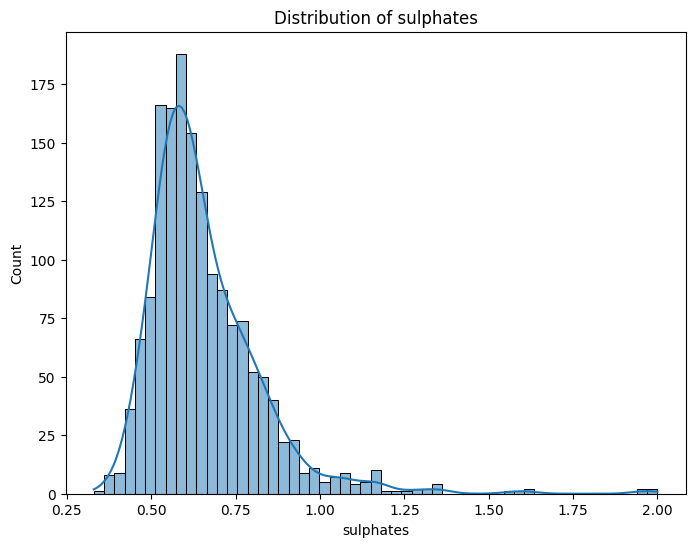

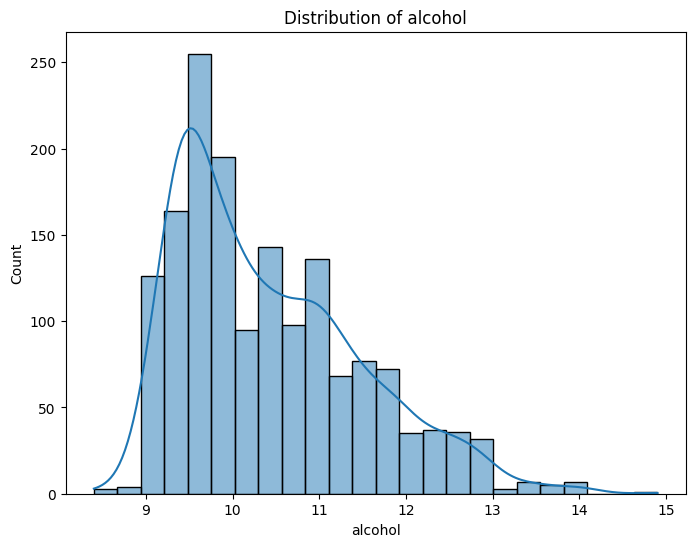

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb

# Load the dataset
wine_data = pd.read_csv('wine.csv')

# Plot histograms of numerical features
numerical_features = wine_data.select_dtypes(include=['float64'])

for feature in numerical_features.columns:
    pt.figure(figsize=(8, 6))
    sb.histplot(wine_data[feature], kde=True)
    pt.title(f'Distribution of {feature}')
    pt.show()

To improve normality in these features, you can apply various transformations:
1. **Logarithmic transformation:** Apply a logarithmic transformation (e.g., np.log) to features with right-skewed distributions.
2. **Square root transformation:** Use the square root transformation (e.g., np.sqrt) for features with moderate skewness.
3. **Box-Cox transformation:** For features with more complex distributions, you can try the Box-Cox transformation, which can handle a range of skewness levels.
4. **Normalization:** Standardize features to have a mean of 0 and a standard deviation of 1. This can also help in making distributions more normal.

---
#### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
ds = pd.read_csv('wine.csv')

# Separate features and target variable (quality)
X = ds.drop(columns=['quality'])
y = ds['quality']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Find the minimum number of components to explain 90% of the variance
n_components_90 = (cumulative_explained_variance >= 0.90).sum() + 1  # Add 1 to include the first component

# Print the results
print(f"Number of components required to explain 90% of the variance: {n_components_90}")

Number of components required to explain 90% of the variance: 6
